In [44]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [4]:
# If you've taken the zipped folder and you haven't uncompressed it yet
# this can be done immediately in nb / terminal, just uncomment the lines 
# below and run
# !unzip train.zip; !unzip test.zip

In [6]:
# First we would inspect our data directory

!cd train; ls


hot_dog     not_hot_dog


In [7]:
# In the next four cells we're just checking how many images there are in each sub-folder
!cd train/hot_dog; ls -1q *.jpg | wc -l

     249


In [8]:
!cd train/not_hot_dog; ls -1q *.jpg | wc -l

     249


In [9]:
!cd test/hot_dog; ls -1q *.jpg | wc -l

     250


In [10]:
!cd test/not_hot_dog; ls -1q *.jpg | wc -l

     250


### 1. Setting up our data generator: getting data from dir to notebook to model


In [33]:
# Ok so we can see that we have balanced classes in the train set.
# We now want to make a data generator (a class of Keras objects); complete the arguments so 
# that it does the following:
# 1. It will rescale all the pixel values by 1./255
# 2. It will take data from our training folder
# 3. It will generate batches of 249 images
# 4. It will clip the images to a target_size of 224 by 224 pixels

data_gen = ImageDataGenerator(rescale= 1./255).flow_from_directory(
                directory = 'train', 
                batch_size = 498,
                target_size=(224, 224),
                seed=123)

Found 498 images belonging to 2 classes.


In [34]:
# Now we inspect our output by running the data_gen just once and then getting the shapes
images, labels = next(data_gen)

In [35]:
# QUESTION:
# Run the cell, there should be four terms coming up. 
# Type down what each of them represents:
#
#
#
#
images.shape

(498, 224, 224, 3)

In [36]:
# QUESTION: Is this labels array the way you expected it to be? Why (not)? 
#
labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

### 2. Reshaping label data

In [37]:
#QUESTION: What is the first argument of the function below doing?
#
# QUESTION: 


labels = np.reshape(labels[:,0], (498,1))

In [38]:
labels

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

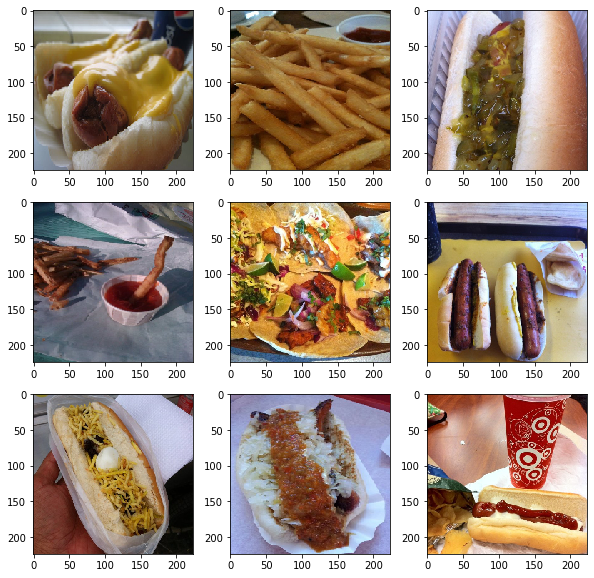

In [39]:
#visualize some images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(images[i])
plt.show()

In [21]:
# Doing our tt_split to get train, val and test data. We can set the test folder to one side for now
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

In [23]:
X_train[0].shape

(224, 224, 3)

### 2. Build the model - FOLLOW ALL INSTRUCTIONS IN THIS CELL TO FILL CELL BELOW
In the cell below this one, instantiate a model, assigning it the name "cnn".

First we want to define our convolutional and pooling layers. We'll use just four. Add one convolutional layer with 64 nodes, a 3x3 kernel and specify the input shape such that it matches the images you'll be putting into the model. Then add a MaxPooling2D layer with a 2x2 pool_size kernel. 

Add another pair of convolutional and pool layers with all params exactly the same, exept that it should have only 32 nodes. 

QUESTION: between your Convolutional/Pool layers and your Dense Neural Network, there is one more layer that must come in between: which layer is it? Add it to the model. No need to add any parameters to it, just leave the layer's brackets empty.

Add one hidden dense layer with 32 nodes. 

QUESTION: which activation function has the following behaviour? If you pass it a number greater than 0, it will return that number; if you pass it a number less than 0, it will return just 0? 
For both convolutional layers and your one hidden Dense layer, use that activation function. 

Then add your final Dense layer, the output:
QUESTION: how many nodes should this one have? Which activation function would be best suited for this? 

Last part: 
Compile your model, using binary crossentropy as your loss function and adam as your optimizer. 





In [51]:

cnn = models.Sequential()
cnn.add(layers.Conv2D(64, kernel_size = (3,3), input_shape=(224,224,3),  activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size = (2,2)))
cnn.add(layers.Conv2D(32, kernel_size = (3,3), input_shape=(224,224,3),  activation='relu')) 
cnn.add(layers.MaxPooling2D(pool_size = (2,2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile( loss='binary_crossentropy'  ,  optimizer='adam' ,
              metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [52]:
# EXTRA: what command can we run to have a glance at our model's structure?

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2986016   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

#### 4. Run the model 

Fit this model to the training data for 10 epochs, doing backpropagation every 32 images, and using our validation data set as well for validation.


In [54]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))


Train on 318 samples, validate on 80 samples
Epoch 1/10
318/318 [==============================] - 13s 42ms/step - loss: 1.4389 - acc: 0.4874 - val_loss: 0.6955 - val_acc: 0.5125
Epoch 2/10
318/318 [==============================] - 13s 41ms/step - loss: 0.6937 - acc: 0.4843 - val_loss: 0.6926 - val_acc: 0.4750
Epoch 3/10
318/318 [==============================] - 13s 40ms/step - loss: 0.6934 - acc: 0.5252 - val_loss: 0.6905 - val_acc: 0.5000
Epoch 4/10
318/318 [==============================] - 13s 40ms/step - loss: 0.6872 - acc: 0.5975 - val_loss: 0.6876 - val_acc: 0.5000
Epoch 5/10
318/318 [==============================] - 14s 44ms/step - loss: 0.6902 - acc: 0.5629 - val_loss: 0.6885 - val_acc: 0.6625
Epoch 6/10
318/318 [==============================] - 15s 47ms/step - loss: 0.6824 - acc: 0.5849 - val_loss: 0.6822 - val_acc: 0.6125
Epoch 7/10
318/318 [==============================] - 12s 38ms/step - loss: 0.6770 - acc: 0.5818 - val_loss: 0.6759 - val_acc: 0.5125
Epoch 8/10
318/3

In [56]:
def plot_progress(fitted_model):
    hist_cnn = fitted_model.history
    loss_values = hist_cnn['loss']
    val_loss_values = hist_cnn['val_loss']
    acc_values = hist_cnn['acc'] 
    val_acc_values = hist_cnn['val_acc']


    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize=(15,4))
    plt.subplot(121)
    plt.plot(epochs, loss_values, 'g.', label='Training loss')
    plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(epochs, acc_values, 'r.', label='Training acc')
    plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    return 

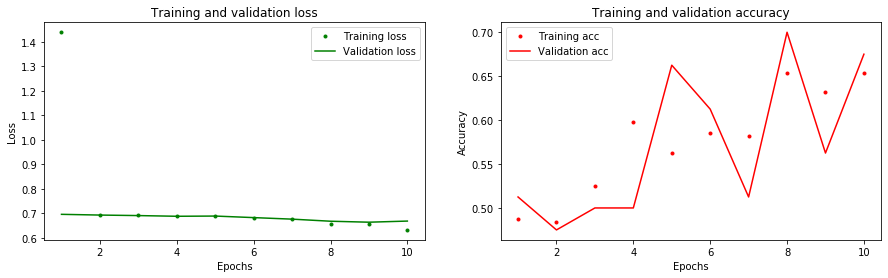

In [57]:
plot_progress(cnn1)

In [58]:
# QUESTION: How would you evaluate the model's performance? 
# Do so and then print out the results  

results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

100/100 [==============================] - 1s 9ms/step
[0.6451650670489425, 0.7264150977134705] [0.6805383586883544, 0.47999998927116394]


In [61]:
from keras.optimizers import Adam, SGD

adam = Adam(learning_rate=0.01)
sgd = SGD(learning_rate=0.01, momentum=0.5, nesterov=True)


cnn2 = models.Sequential()
cnn2.add(layers.Conv2D(64, kernel_size = (3,3), input_shape=(224,224,3),  activation='relu'))
cnn2.add(layers.MaxPooling2D(pool_size = (2,2)))
cnn2.add(layers.Conv2D(32, kernel_size = (3,3), input_shape=(224,224,3),  activation='relu'))
cnn2.add(layers.MaxPooling2D(pool_size = (2,2)))
cnn2.add(layers.Conv2D(18, kernel_size = (3,3), input_shape=(224,224,3),  activation='relu')) 
cnn2.add(layers.MaxPooling2D(pool_size = (2,2)))
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(32, activation='relu'))
cnn2.add(layers.Dropout(0.2))
cnn2.add(layers.Dense(1, activation='sigmoid'))

cnn2.compile( loss='binary_crossentropy'  ,  optimizer=sgd ,
              metrics=['acc'])

In [62]:
cnn2_hist = cnn2.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_val, y_val))

Train on 318 samples, validate on 80 samples
Epoch 1/10
318/318 [==============================] - 15s 46ms/step - loss: 0.6933 - acc: 0.5346 - val_loss: 0.6918 - val_acc: 0.5125
Epoch 2/10
318/318 [==============================] - 14s 44ms/step - loss: 0.6928 - acc: 0.5220 - val_loss: 0.6899 - val_acc: 0.5125
Epoch 3/10
318/318 [==============================] - 14s 43ms/step - loss: 0.6931 - acc: 0.5189 - val_loss: 0.6903 - val_acc: 0.5125
Epoch 4/10
318/318 [==============================] - 14s 44ms/step - loss: 0.6898 - acc: 0.5377 - val_loss: 0.6871 - val_acc: 0.6875
Epoch 5/10
318/318 [==============================] - 15s 48ms/step - loss: 0.6881 - acc: 0.5283 - val_loss: 0.6819 - val_acc: 0.6625
Epoch 6/10
318/318 [==============================] - 16s 49ms/step - loss: 0.6829 - acc: 0.5849 - val_loss: 0.6712 - val_acc: 0.6625
Epoch 7/10
305/318 [===========================>..] - ETA: 0s - loss: 0.6587 - acc: 0.6295

KeyboardInterrupt: 

In [64]:
cnn.predict_proba(X_val)

array([[0.50809056],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.5070112 ],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.28152776],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.5009161 ],
       [0.4124377 ],
       [0.45909256],
       [0.50809056],
       [0.50809056],
       [0.4172334 ],
       [0.50809056],
       [0.50809056],
       [0.50778925],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.39155585],
       [0.38533562],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.50809056],
       [0.3218763 ],
       [0.50809056],
       [0.50809056],
       [0.44758174],
       [0.5044979 ],
       [0.47341853],
       [0.50809056],
       [0.45683765],
       [0.44289747],
       [0.508